In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Capstone/creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
duplicate_rows = df.duplicated().sum()
print(duplicate_rows)

1081


In [10]:
df = df.drop_duplicates()
duplicate_rows = df.duplicated().sum()
print(duplicate_rows)

0


In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


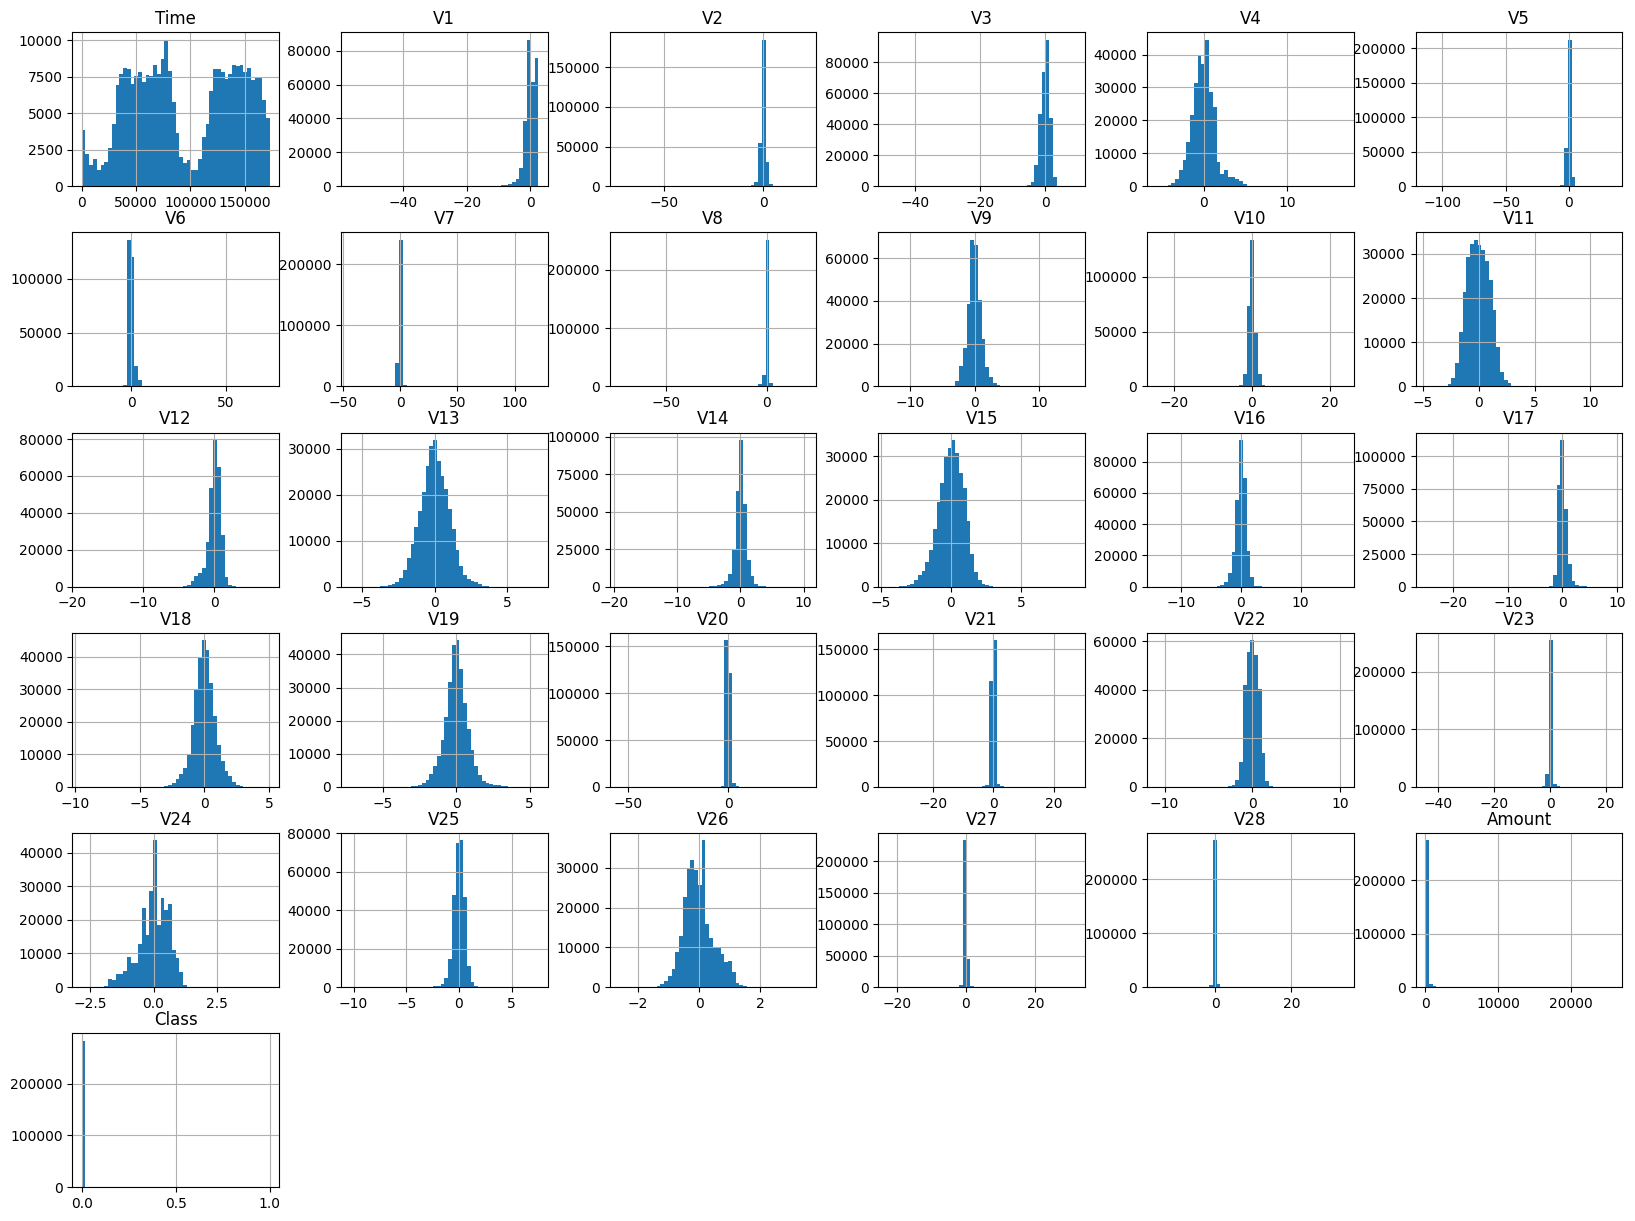

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

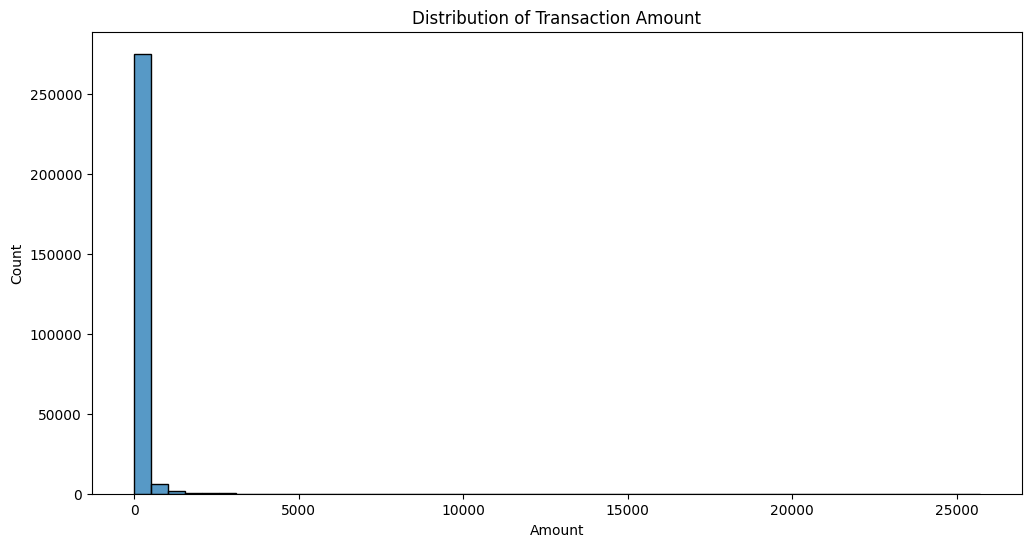

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Amount'], bins=50)
plt.title('Distribution of Transaction Amount')
plt.show()

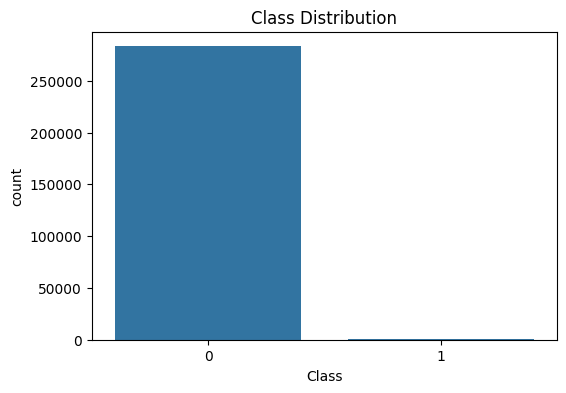

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

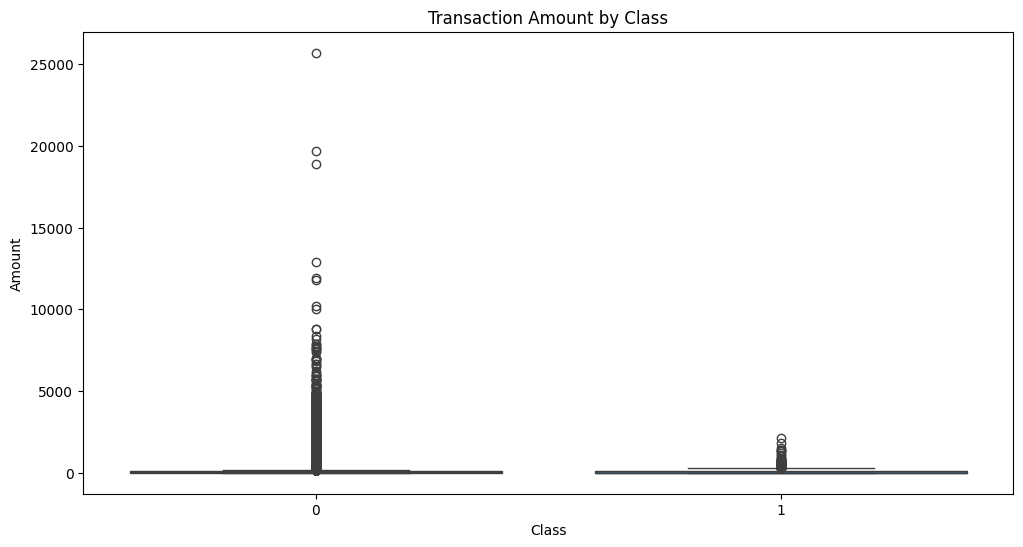

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.show()

In [16]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Amount'] >= Q1 - 1.5 * IQR) & (df['Amount'] <= Q3 + 1.5 * IQR)]

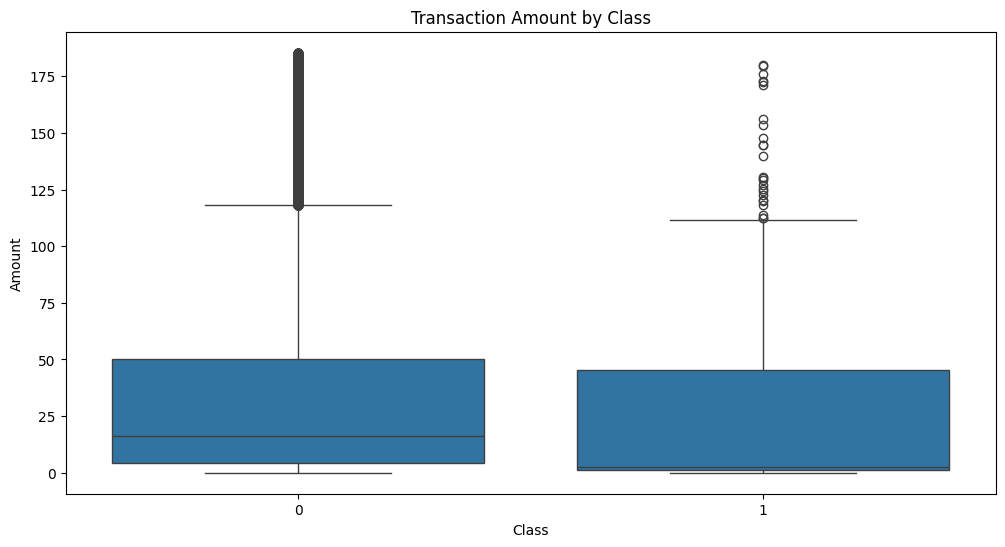

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.show()

In [18]:
len(df)

252041

In [19]:
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    251655
1       386
Name: count, dtype: int64


In [20]:
non_fraudulent_count = class_counts[0]
fraudulent_count = class_counts[1]

print(f"Non-Fraudulent Transactions: {non_fraudulent_count}")
print(f"Fraudulent Transactions: {fraudulent_count}")

Non-Fraudulent Transactions: 251655
Fraudulent Transactions: 386


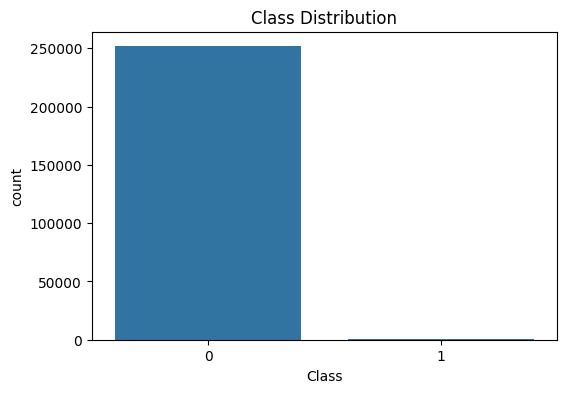

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

In [22]:
X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [24]:
y_resampled .value_counts()

,count
Class,
0,251655
1,251655


In [25]:
y_train.value_counts()

,count
Class,
1,201416
0,201232


In [26]:
y_test.value_counts()

,count
Class,
0,50423
1,50239


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn_model.predict(X_test)

In [29]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.9643360950507639
F1 Score: 0.9644723299817908
Recall: 0.9699436692609328
ROC AUC Score: 0.9643463264298435


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [32]:
y_pred_lr = lr.predict(X_test_scaled)

In [33]:
accuracy_logistic = accuracy_score(y_test, y_pred_lr)
precision_logistic  = precision_score(y_test, y_pred_lr)
recall_logistic  = recall_score(y_test, y_pred_lr)
f1_logistic  = f1_score(y_test, y_pred_lr)
roc_auc_logistic = roc_auc_score(y_test, y_pred_lr)

In [34]:
print(f"Logistic Regression Accuracy: {accuracy_logistic }")
print(f"Logistic Regression Precision: {precision_logistic }")
print(f"Logistic Regression Recall: {recall_logistic }")
print(f"Logistic Regression F1 Score: {f1_logistic }")
print(f"Logistic Regression ROC AUC Score: {roc_auc_logistic}")

Logistic Regression Accuracy: 0.9810454789294868
Logistic Regression Precision: 0.9918384792298455
Logistic Regression Recall: 0.970003383825315
Logistic Regression F1 Score: 0.9807994203598599
Logistic Regression ROC AUC Score: 0.9810253319182105


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

In [36]:
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='f1',
    cv=5
)

In [37]:
grid_search_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [38]:
best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for KNN:", best_params_knn)

Best Hyperparameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}


In [39]:
best_knn_model = KNeighborsClassifier(**best_params_knn)
best_knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [40]:
y_pred_best_knn = best_knn_model.predict(X_test_scaled)

In [41]:
acc = accuracy_score(y_test, y_pred_best_knn)
f1 = f1_score(y_test, y_pred_best_knn)
recall = recall_score(y_test, y_pred_best_knn)
roc_auc = roc_auc_score(y_test, y_pred_best_knn)

print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.9995132224672667
F1 Score: 0.999512568762621
Recall: 1.0
ROC AUC Score: 0.9995141106241199


In [47]:
import pickle

In [50]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(best_knn_model, open('best_knn_model.pkl','wb'))